# Credit Card Fraud Detection  

In [112]:
# required libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
sns.set_theme(style="darkgrid")

In [113]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('D:\AI\Practicing Machine learnig\Projects\creditcard.csv')

In [114]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [115]:
# last five data
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [116]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [117]:
# checking the number of missing values in each column
print(credit_card_data.isnull().sum())

print("Count of missing values : ", sum(credit_card_data.isnull().sum()))

# this dataset doesnot contain any missing values 


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Count of missing values :  0


0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

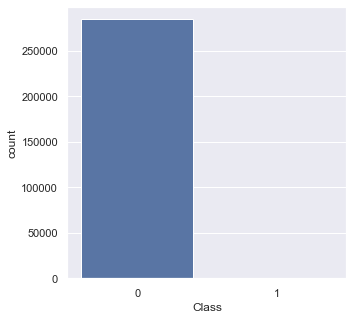

In [118]:
# distribution of legit transactions & fraudulent transactions
print(credit_card_data['Class'].value_counts())

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Class',data=credit_card_data)

This dataset is imbalanced since the distribution of the classes are not equal. \
So, creating a balanced dataset is important before feeding data to ML model. 

0 -----> Normal Transaction \
1 -----> Fraudlend transaction 

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [119]:
# separating the data for analysis
legit_data = credit_card_data[credit_card_data['Class'] == 0]
fraud_data = credit_card_data[credit_card_data['Class'] == 1]

In [120]:
print(legit_data.shape)
print(fraud_data.shape)

(284315, 31)
(492, 31)


In [121]:
# statistical measures of the legit data
legit_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [122]:
# statistical measures of the fraud data
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [123]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling is the process of making balanced dataset from unbalanced dataset \n

Let us create a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [124]:
# let us select 492 randam samples from normal transaction

legit_sample = legit_data.sample(n=492)

Concatenating two DataFrames

In [125]:
# create new balanced dataset 
new_dataset = pd.concat([legit_sample, fraud_data], axis=0)  

# axis = 0 -> all the 492 rows added below the dataset

In [126]:
# verify the dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217507,140918.0,1.863502,-0.207711,-1.937564,0.415320,0.218681,-0.925070,0.185244,-0.159458,0.515612,...,0.269945,0.678513,-0.127984,-0.486192,0.182019,-0.100659,-0.026979,-0.032832,88.50,0
267375,162746.0,1.889509,-0.109004,-1.724454,0.317294,0.265273,-0.683369,0.124150,-0.153417,0.668214,...,-0.169321,-0.331890,0.084179,-0.487549,-0.059786,-0.090858,-0.012869,-0.024352,63.22,0
231013,146577.0,-0.728468,1.424899,0.254824,-0.477786,-0.251819,-1.672522,0.907656,-0.073322,0.167427,...,-0.268386,-0.390594,0.195113,0.933473,-0.491581,0.064261,0.185595,-0.067612,10.11,0
80559,58540.0,-2.714255,1.454145,1.352335,0.646395,-0.287970,0.126913,0.339902,-0.061902,2.392129,...,-0.314478,0.720197,-0.339148,0.075899,0.186072,-0.214750,0.417538,0.075540,11.36,0
279840,169122.0,1.873672,-0.809305,-2.090539,-1.942691,0.781904,0.716903,-0.126040,0.196157,1.210544,...,0.393354,1.268907,-0.019172,-0.649172,0.083270,0.057092,0.008639,-0.072010,68.33,0


In [127]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [128]:
new_dataset['Class'].value_counts()

# now we have same distribution for both classes 

1    492
0    492
Name: Class, dtype: int64

In [129]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93411.136179,0.011971,-0.026194,0.049320,-0.039682,-0.011783,0.005040,0.063349,0.023351,-0.015331,...,-0.014782,-0.041233,0.028472,-0.038806,-0.005126,0.005806,-0.037140,-0.018286,-0.028605,89.259126
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [130]:
# drop the Class column 
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [131]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
217507  140918.0  1.863502 -0.207711 -1.937564  0.415320  0.218681 -0.925070   
267375  162746.0  1.889509 -0.109004 -1.724454  0.317294  0.265273 -0.683369   
231013  146577.0 -0.728468  1.424899  0.254824 -0.477786 -0.251819 -1.672522   
80559    58540.0 -2.714255  1.454145  1.352335  0.646395 -0.287970  0.126913   
279840  169122.0  1.873672 -0.809305 -2.090539 -1.942691  0.781904  0.716903   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [132]:
print(Y)

217507    0
267375    0
231013    0
80559     0
279840    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data \
Training set ----> 80% \
Test set --------> 20%

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [134]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# ML model

Logistic Regression

In [135]:
model = LogisticRegression()

In [136]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

Accuracy Score

In [137]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [138]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [139]:
# accuracy on test data
Y_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_prediction, Y_test)

In [140]:
print('Accuracy score on Test Data : ', test_data_accuracy )

Accuracy score on Test Data :  0.9238578680203046


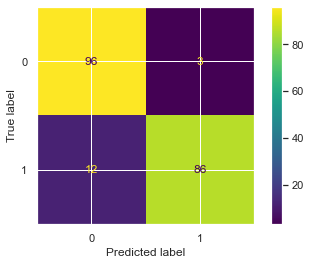

In [141]:
# classification report
cm = confusion_matrix(Y_test, Y_prediction, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()
plt.show()

In [142]:
print(confusion_matrix(Y_test, Y_prediction, labels=model.classes_))
tp, fn, fp, tn = confusion_matrix(Y_test, Y_prediction, labels=model.classes_).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


[[96  3]
 [12 86]]
Outcome values : 
 96 3 12 86


tp, fn, fp, tn = confusion_matrix(Y_test, Y_prediction, labels=model.classes_)).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

In [143]:
print(classification_report(Y_test, Y_prediction, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



# Summary


1. Data Preprocessing---> convert imbalaned dataset into balanced dataset
2. Splitting balaned dataset into training set and test set  
3. Create and train ML model using logistic regression  
4. Evaluate the model using confusion matrix  
5. The model gives 93% as training accuracy and 90% as testing accuracy, so the model is good but it can be improved.
 
